# Loading the data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
import numpy as np

# Load the dataset
df = pd.read_csv('1553768847-housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Checking information

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Checking Shape

In [29]:
df.shape

(20640, 10)

# Checking null values

In [30]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

# Fill missing values in 'total_bedrooms' with the median value of the column

In [31]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [32]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Summary statistics

In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Categorical Graph (Bar Chart for Ocean Proximity)

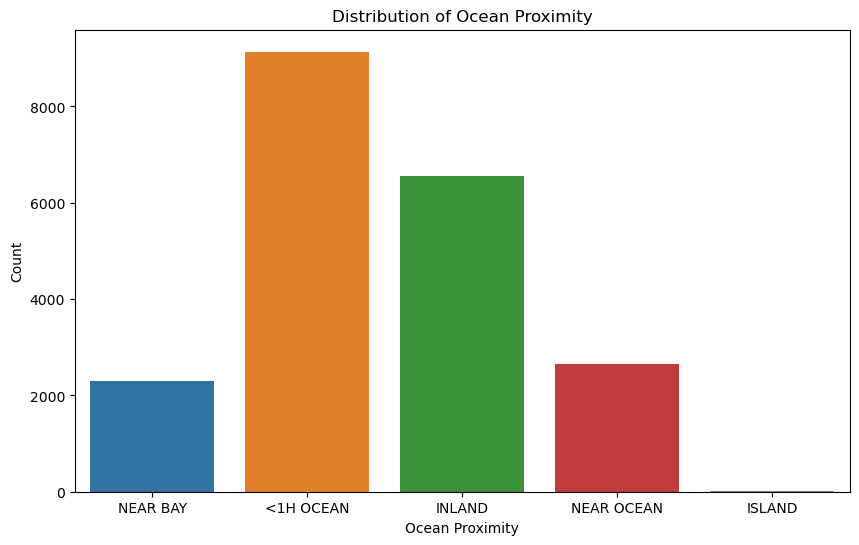

In [10]:
def plot_ocean_proximity_bar_chart():
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='ocean_proximity')
    plt.title('Distribution of Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel('Count')
    plt.show()

plot_ocean_proximity_bar_chart()


# Relational Graph (Scatter Plot for Latitude vs Longitude)

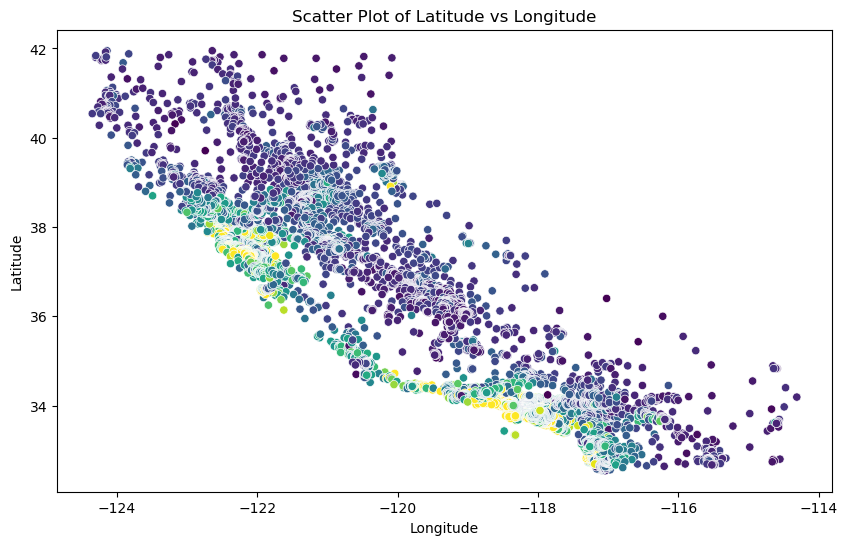

In [12]:
def plot_latitude_longitude_scatter():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis', legend=None)
    plt.title('Scatter Plot of Latitude vs Longitude')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

plot_latitude_longitude_scatter()


# Statistical Graph (Heatmap of Correlation Matrix)

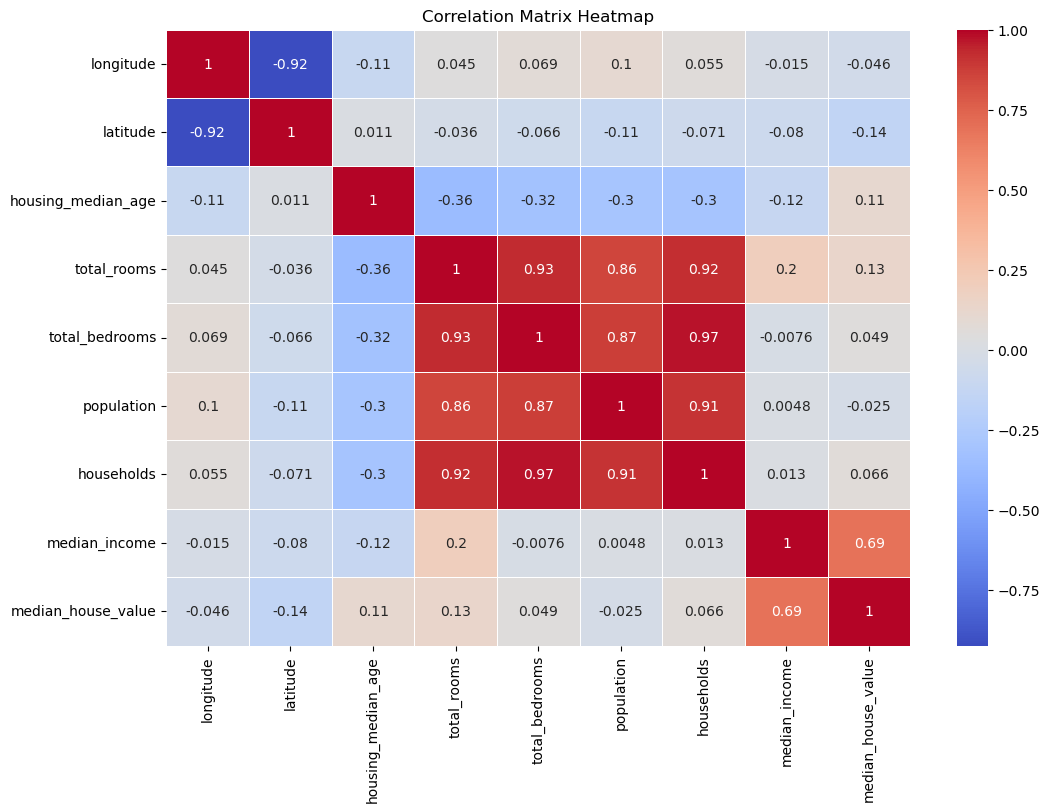

In [14]:
# Function to plot the correlation heatmap
def plot_correlation_heatmap():
    plt.figure(figsize=(12, 8))
    # Exclude the 'ocean_proximity' column
    correlation_matrix = df.drop('ocean_proximity', axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_correlation_heatmap()


# Elbow Plot

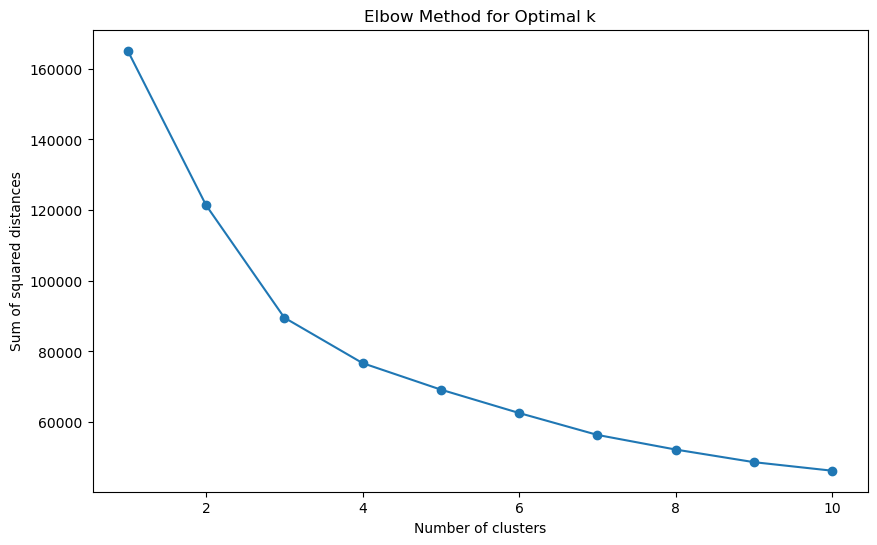

In [16]:
import warnings
warnings.filterwarnings("ignore")
def plot_elbow(df):
    features = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(features_scaled)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.show()

plot_elbow(df)


# K-means Clustering Analysis Function


K-means Clustering with 3 clusters:
Cluster Centers:
[[ 0.77303879 -0.79079938  0.08241644 -0.21792655 -0.20062258 -0.14232961
  -0.19577383  0.01127076]
 [-1.07367055  1.0918053   0.09103858 -0.20614885 -0.24227209 -0.28252713
  -0.24848177 -0.05379257]
 [ 0.20443507 -0.17828914 -0.9484389   2.34463173  2.40628613  2.22951279
   2.40509112  0.18304039]]


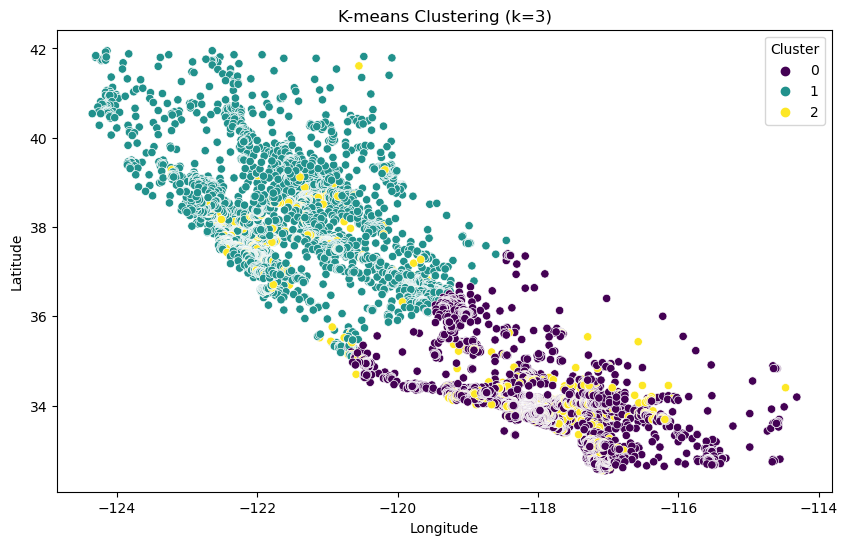

In [19]:
def perform_kmeans_clustering(df, n_clusters):
    features = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(features_scaled)
    labels = kmeans.labels_
    print(f'K-means Clustering with {n_clusters} clusters:')
    print(f'Cluster Centers:\n{kmeans.cluster_centers_}')
    # Add the cluster labels to the original dataframe
    df['Cluster'] = labels
    # Plot the clustered data
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster', palette='viridis', legend='full')
    plt.title(f'K-means Clustering (k={n_clusters})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
perform_kmeans_clustering(df, n_clusters=3)

# Linear Regression Fitting Analysis Function

Linear Regression Analysis:
R-squared: 0.4734
Mean Absolute Error (MAE): 62625.9338

Sample of Actual and Predicted Values:
 Actual     Predicted
 269300 232576.963608
  81600 124493.890187
 137100 275520.143663
  98800 144822.418439
 206300 179306.523415
 241700 277392.508107
 416700 342381.943616
 274100 334018.994391
 127000 145900.699748
 348500 207659.470714


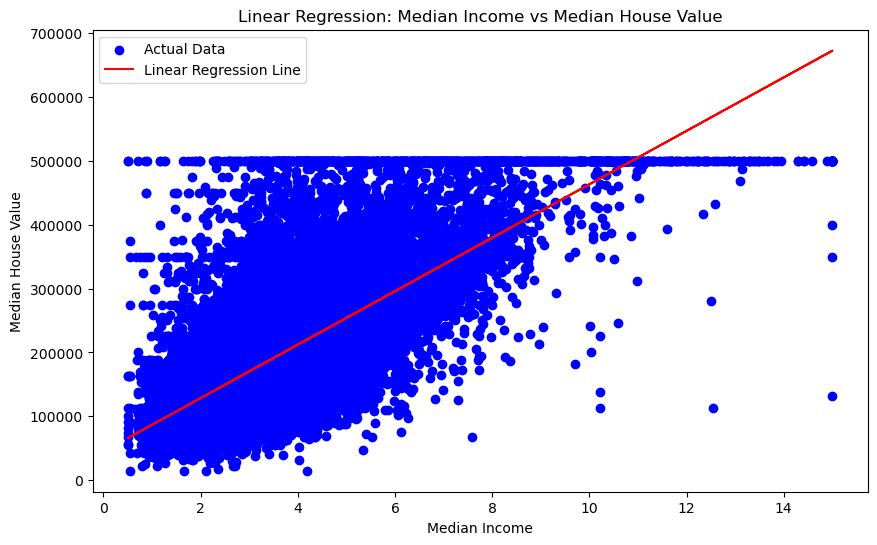

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
def perform_linear_regression(df):
    X = df[['median_income']]
    y = df['median_house_value']
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)
    
    y_pred = linear_regressor.predict(X)
    r_squared = linear_regressor.score(X, y)
    mae = mean_absolute_error(y, y_pred)
    print(f'Linear Regression Analysis:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
    sample_results = results_df.sample(n=10)  # Adjust the sample size as needed

    print("\nSample of Actual and Predicted Values:")
    print(sample_results.to_string(index=False))  # Display the sample results as a table

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Linear Regression Line')
    plt.title('Linear Regression: Median Income vs Median House Value')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.legend()
    
    plt.show()

perform_linear_regression(df)

